In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('weight-height.csv')

In [4]:
df.shape

(10000, 3)

In [5]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


<Axes: xlabel='Weight', ylabel='Density'>

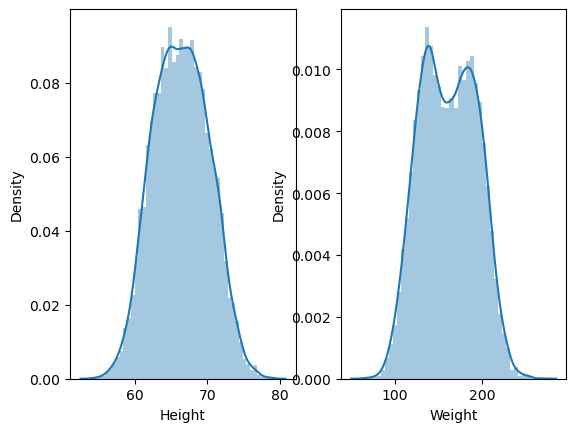

In [6]:
plt.subplot(121)
sns.distplot(df['Height'])
plt.subplot(122)
sns.distplot(df['Weight'])

<Axes: >

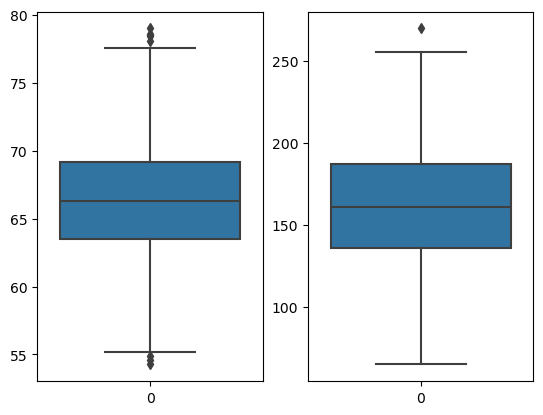

In [7]:
plt.subplot(121)
sns.boxplot(df['Height'])
plt.subplot(122)
sns.boxplot(df['Weight'])


In [8]:
upper_limit=df['Height'].quantile(0.99)
upper_limit

74.7857900583366

In [9]:
lower_limit=df['Height'].quantile(0.01)
lower_limit

58.13441158671655

In [10]:
df[(df['Height']>=74.78)| (df['Height']<=58.13)]#these are the outliers which needs to be discarded

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [11]:
#cleaned data after outlier removal
new_df=df[(df['Height']<=74.78 )&(df['Height']>=58.13)]

In [12]:
new_df.describe()

,Height,Weight
count,9799.000000,9799.000000
mean,66.363507,161.391522
std,3.644267,30.925072
min,58.134496,77.523774
25%,63.577147,136.320936
50%,66.317899,161.201891
75%,69.119859,186.747036
max,74.767447,249.946283


<Axes: xlabel='Height', ylabel='Density'>

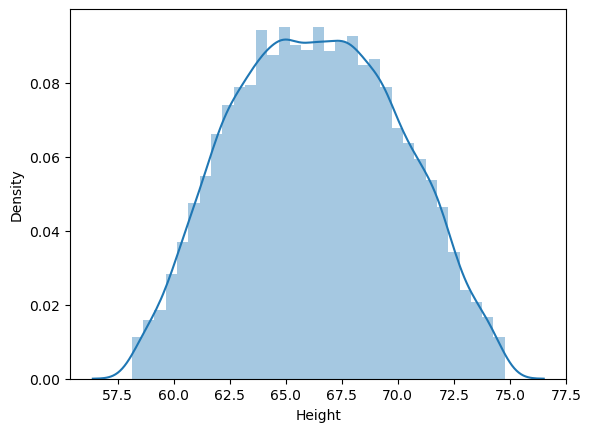

In [13]:
sns.distplot(new_df['Height'])

<Axes: >

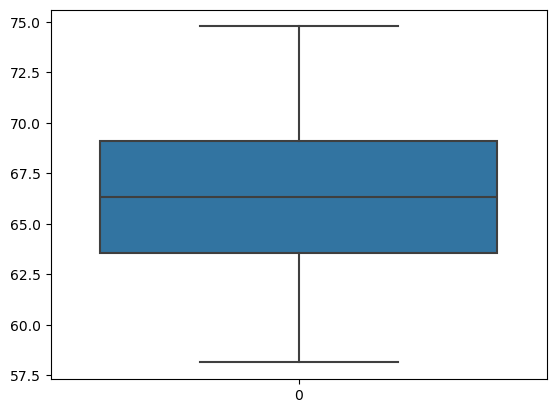

In [14]:
sns.boxplot(new_df['Height'])

In [15]:
#Trying more higher value
upper_limit=df['Height'].quantile(0.995)
upper_limit

75.69040357130585

In [16]:
lower_limit=df['Height'].quantile(0.005)
lower_limit

57.31280913400189

In [17]:
new_df2=df[(df['Height']<=75.69 )&(df['Height']>=57.31)]
new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

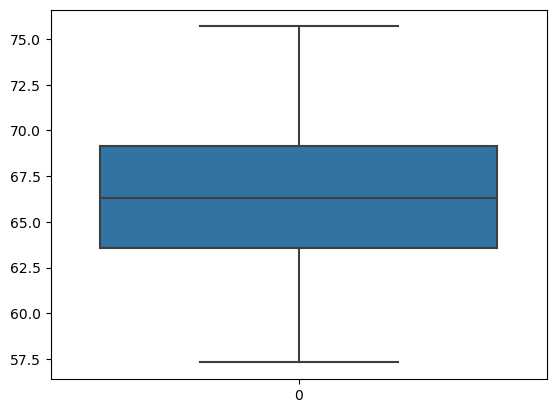

In [18]:
sns.boxplot(new_df2['Height'])

In [19]:
#Trying more higher value
upper_limit=df['Height'].quantile(0.997)
upper_limit

76.43461619654101

In [20]:
lower_limit=df['Height'].quantile(0.003)
lower_limit

56.82220407107042

In [21]:
new_df3=df[(df['Height']<=75.69 )&(df['Height']>=57.31)]
new_df3

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: >

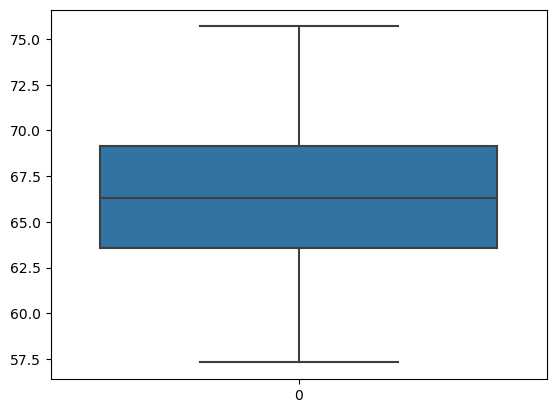

In [22]:
sns.boxplot(new_df3['Height'])

CAPPING


In [23]:
df['Height'] = np.where(df['Height'] >= upper_limit,
        upper_limit,
        np.where(df['Height'] <= lower_limit,
        lower_limit,
        df['Height']))

<Axes: xlabel='Height', ylabel='Density'>

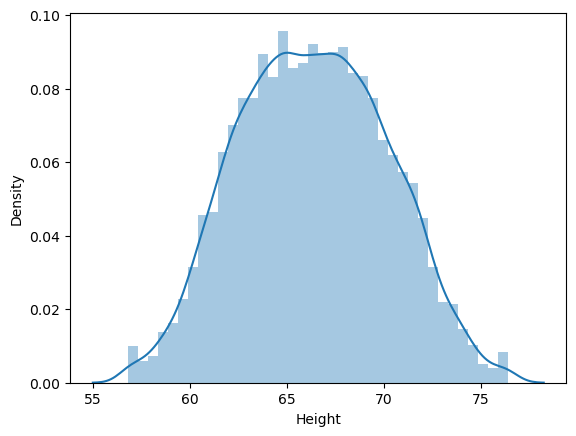

In [25]:
sns.distplot(df['Height'])

<Axes: >

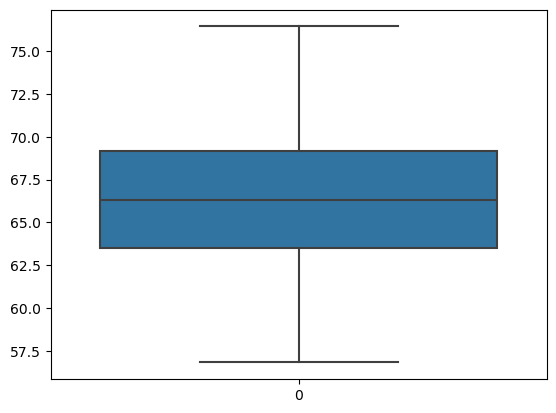

In [26]:
sns.boxplot(df['Height'])